In [1]:
import os
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Importing datasets

In [2]:
pwd = os.getcwd()
path_true = os.path.join(pwd, 'True.csv')
df_true = pd.read_csv(path_true)
path_fake = os.path.join(pwd, 'Fake.csv')
df_false = pd.read_csv(path_fake)

In [3]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## Marking true and false news and making putting them together

In [5]:
df_true['Marker'] = 1
df_false['Marker'] = 0

In [6]:
df = df_true.append(df_false)

In [7]:
df

,title,text,subject,date,Marker
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


# EDA

In [8]:
df.head()

,title,text,subject,date,Marker
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
df.shape

(44898, 5)

In [10]:
df.columns

Index(['title', 'text', 'subject', 'date', 'Marker'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Marker   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [12]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
Marker     0
dtype: int64

# NLP

In [13]:
input_arr = np.array(df['title'])

In [14]:
input_arr

array(['As U.S. budget fight looms, Republicans flip their fiscal script',
       'U.S. military to accept transgender recruits on Monday: Pentagon',
       "Senior U.S. Republican senator: 'Let Mr. Mueller do his job'",
       ...,
       'Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria',
       'How to Blow $700 Million: Al Jazeera America Finally Calls it Quits',
       '10 U.S. Navy Sailors Held by Iranian Military – Signs of a Neocon Political Stunt'],
      dtype=object)

In [15]:
# put these before the function so that they are only calculated once
s = PorterStemmer()
stopwords_set = set(stopwords.words('english'))

def preprocess(title):
    # By Python definition '\W == [^a-zA-Z0-9_]
    return ' '.join([s.stem(word)
              for word in re.sub(r'[\W]', ' ', input_arr[title]).lower().split() if not word in stopwords_set])


In [16]:
df = df.drop(columns=['date','subject'], axis=1)

In [17]:
df

,title,text,Marker
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [18]:
corpus_text = []

# nltk.download('stopwords')

for i in range(0, len(df)):
    array = preprocess(i)
    corpus_text.append(array)

In [19]:
df

,title,text,Marker
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [20]:
corpus_text

['u budget fight loom republican flip fiscal script',
 'u militari accept transgend recruit monday pentagon',
 'senior u republican senat let mr mueller job',
 'fbi russia probe help australian diplomat tip nyt',
 'trump want postal servic charg much amazon shipment',
 'white hous congress prepar talk spend immigr',
 'trump say russia probe fair timelin unclear nyt',
 'factbox trump twitter dec 29 approv rate amazon',
 'trump twitter dec 28 global warm',
 'alabama offici certifi senat elect jone today despit challeng cnn',
 'jone certifi u senat winner despit moor challeng',
 'new york governor question constitution feder tax overhaul',
 'factbox trump twitter dec 28 vaniti fair hillari clinton',
 'trump twitter dec 27 trump iraq syria',
 'man say deliv manur mnuchin protest new u tax law',
 'virginia offici postpon lotteri draw decid tie statehous elect',
 'u lawmak question businessman 2016 trump tower meet sourc',
 'trump twitter dec 26 hillari clinton tax cut bill',
 'u appeal cour

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(corpus_text)
X = vectorizer.transform(corpus_text).toarray()
y = df.iloc[0:len(df), 2].values

In [22]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
len(X)

44898

In [25]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [26]:
len(y)

44898

In [31]:
df

,title,text,Marker
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


# Machine Learning

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

svm_ = svm.SVC()
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state = 0)
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)

def alg(X_train, X_test, y_train, y_test, mdl):

    #using the model to predict
    y_pred = mdl.fit(X_train, y_train).predict(X_test)

    y_train_pred = cross_val_predict(mdl, X_train, y_train, cv=3)

    # creating the confusion matrix to analyse our data
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Sensitivity of our data
    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity : ', 100*sensitivity )

    # Specificity of our data
    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity : ', 100*specificity)

    # Getting the precision, recall, accuracy and f1 scores of our data
    precision = 100*precision_score(y_train, y_train_pred)
    recall = 100*recall_score(y_train, y_train_pred)
    accuracy = 100*accuracy_score(y_train, y_train_pred)
    f1 = 100*f1_score(y_train, y_train_pred)


    print('Precision Score: ', 100*precision_score(y_train, y_train_pred)) 
    print('Recall Score: ', 100*recall_score(y_train, y_train_pred)) 
    print('Accuracy Score: ', 100*accuracy_score(y_train, y_train_pred)) 
    print('F1 Score: ', 100*f1_score(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

    #Plotting the confusion matrix
    sns.heatmap(conf_matrix, annot=True)
    plt.show()

    # #Plotting ROC curve
    # fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = gnb.predict_proba(X_test)[: ,0])
    # plt.plot(fpr, tpr, linewidth=2)
    # plt.plot([0,1], [0,1], 'k--')
    # plt.xlabel("False Negative Rate")
    # plt.ylabel("True Negative Rate (Recall)")
    # print('Negative AUC: ',auc(fpr,tpr))
    # fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = gnb.predict_proba(X_test)[: ,1])
    # plt.plot(fpr, tpr, linewidth=2)
    # plt.plot([0,1], [0,1], 'k--')
    # plt.xlabel("False Positive Rate")
    # plt.ylabel("True Positive Rate (Recall)")
    # plt.show()
    # print('Positive AUC: ', auc(fpr,tpr))

    return precision, recall, accuracy, f1

Sensitivity :  93.99101017269932
Specificity :  73.47813661046013
Precision Score:  72.38576238576239
Recall Score:  93.93296298608077
Accuracy Score:  80.06414634870667
F1 Score:  81.76360327076145
              precision    recall  f1-score   support

           0       0.92      0.67      0.78     17652
           1       0.72      0.94      0.82     16021

    accuracy                           0.80     33673
   macro avg       0.82      0.81      0.80     33673
weighted avg       0.83      0.80      0.80     33673



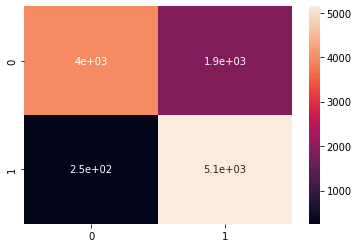

Negative AUC:  0.17652862575494505


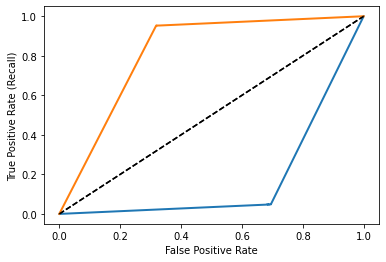

Positive AUC:  0.8170733618785243


(72.38576238576239, 93.93296298608077, 80.06414634870667, 81.76360327076145)

In [38]:
alg(X_train, X_test, y_train, y_test, gnb)

Sensitivity :  95.68607068607069
Specificity :  94.38841004951402
Precision Score:  93.12967808677661
Recall Score:  95.52462393109045
Accuracy Score:  94.5178629762718
F1 Score:  94.31194922043508
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     17652
           1       0.93      0.96      0.94     16021

    accuracy                           0.95     33673
   macro avg       0.94      0.95      0.95     33673
weighted avg       0.95      0.95      0.95     33673



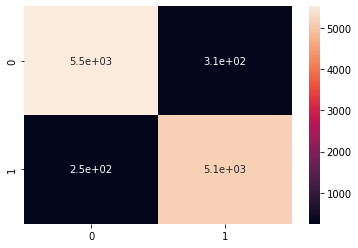

Negative AUC:  0.17652862575494505


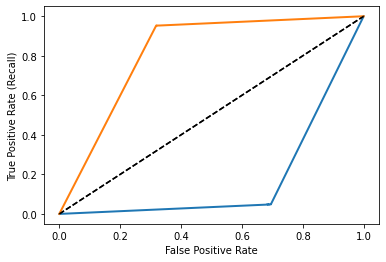

Positive AUC:  0.8170733618785243


(93.12967808677661, 95.52462393109045, 94.5178629762718, 94.31194922043508)

In [39]:
alg(X_train, X_test, y_train, y_test, lr)

In [ ]:
alg(X_train, X_test, y_train, y_test, rf)